In [32]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import ppscore as pps#pip install ppscore
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import dtale#pip install dtale

In [3]:
train=pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/sukhna_dhanas/train_set_label.csv" )

In [4]:
test= pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/sukhna_dhanas/test_set_label.csv')

In [5]:
train

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,microorganism
0,0.711636,0.673498,0.109069,0.870544,0.010808,0.660599,0.094353,0.987915,0.870476,0.447276,...,0.877460,0.871746,0.025669,0.028256,0.010776,0.001776,0.878873,0.453973,0.020195,1
1,0.184271,0.865533,0.181675,0.306442,0.021235,0.183804,0.484926,0.974488,0.284444,0.345343,...,0.295238,0.290794,0.128062,0.077815,0.044747,0.016309,0.325508,0.360384,0.045702,2
2,0.431175,0.679469,0.172644,0.750469,0.020929,0.380940,0.891717,0.946626,0.707302,0.227592,...,0.729524,0.723810,0.065495,0.062696,0.049242,0.006400,0.739531,0.255860,0.042004,2
3,0.712849,0.991839,0.240241,0.271420,0.036976,0.700643,0.016835,0.975159,0.268571,0.468366,...,0.269841,0.268571,0.146561,0.020286,0.035455,0.006678,0.267614,0.568813,0.073303,4
4,0.338077,0.996782,0.123578,0.045654,0.011389,0.088682,0.219150,0.982544,0.041905,0.630931,...,0.041905,0.041905,0.134704,0.011038,0.034491,0.004833,0.071762,0.699979,0.024521,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13819,0.168408,0.981720,0.219246,0.949969,0.031751,0.050051,0.689358,0.931521,0.673651,0.549209,...,0.673651,0.685079,0.255642,0.056345,0.104026,0.024249,0.796577,0.725174,0.062688,3
13820,0.541749,0.916983,0.127094,0.348968,0.017270,0.339002,0.698898,0.978852,0.290159,0.651142,...,0.293333,0.290159,0.050945,0.024784,0.019380,0.003070,0.306036,0.668967,0.025627,2
13821,0.451720,0.942211,0.091780,0.266482,0.007444,0.263728,0.767577,0.993522,0.232327,0.425128,...,0.232327,0.232387,0.047427,0.018674,0.020414,0.002278,0.245519,0.429552,0.015595,3
13822,0.635602,0.921632,0.140325,0.527830,0.015510,0.483057,0.578076,0.991944,0.457778,0.715290,...,0.457778,0.457778,0.049367,0.023263,0.019234,0.003033,0.496439,0.702198,0.029993,4


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13824 entries, 0 to 13823
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Solidity         13824 non-null  float64
 1   Eccentricity     13824 non-null  float64
 2   EquivDiameter    13824 non-null  float64
 3   Extrema          13824 non-null  float64
 4   FilledArea       13824 non-null  float64
 5   Extent           13824 non-null  float64
 6   Orientation      13824 non-null  float64
 7   EulerNumber      13824 non-null  float64
 8   BoundingBox1     13824 non-null  float64
 9   BoundingBox2     13824 non-null  float64
 10  BoundingBox3     13824 non-null  float64
 11  BoundingBox4     13824 non-null  float64
 12  ConvexHull1      13824 non-null  float64
 13  ConvexHull2      13824 non-null  float64
 14  ConvexHull3      13824 non-null  float64
 15  ConvexHull4      13824 non-null  float64
 16  MajorAxisLength  13824 non-null  float64
 17  MinorAxisLen

In [7]:
train.describe()

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,microorganism
count,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,...,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000,13824.000000
mean,0.483543,0.816668,0.158836,0.528733,0.027930,0.390554,0.480102,0.967930,0.483085,0.444948,...,0.487924,0.487700,0.082797,0.043939,0.049383,0.012236,0.515745,0.479954,0.048216,2.500000
std,0.209131,0.168313,0.111070,0.238477,0.048621,0.218697,0.310809,0.045840,0.239790,0.227774,...,0.238699,0.239473,0.086908,0.052404,0.068806,0.041491,0.239394,0.224588,0.065958,1.118074
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000073,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.298202,0.719613,0.091416,0.352069,0.008160,0.213847,0.165487,0.962403,0.307823,0.266257,...,0.317745,0.311429,0.025956,0.020286,0.011265,0.001776,0.336157,0.314578,0.015655,1.750000
50%,0.466642,0.869592,0.135782,0.524431,0.015266,0.354430,0.522795,0.980866,0.459683,0.449033,...,0.463492,0.462857,0.057924,0.028227,0.026138,0.003972,0.508826,0.462994,0.028598,2.500000
75%,0.669901,0.938896,0.209592,0.715447,0.031614,0.523621,0.752532,0.990260,0.661587,0.590510,...,0.668571,0.673651,0.112127,0.056314,0.057580,0.010660,0.710310,0.658128,0.058514,3.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


# Checking whether data is balanced or not

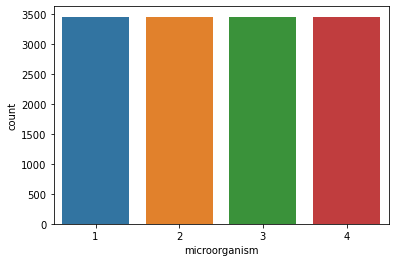

In [27]:
sns.countplot(train['microorganism'])
plt.show()

In [28]:
train['microorganism'].value_counts(normalize=True)*100

4    25.0
3    25.0
2    25.0
1    25.0
Name: microorganism, dtype: float64

# EDA with automatated tools Dtale

In [31]:
dtale.show(train)

# feather importances

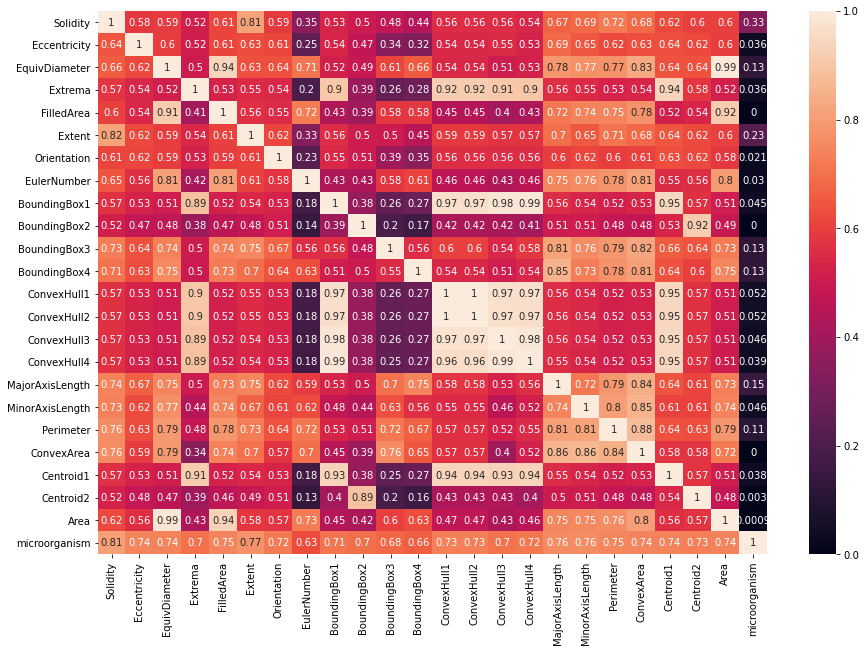

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(pps.matrix(train),annot=True)
plt.show()

In [10]:
train

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,microorganism
0,0.711636,0.673498,0.109069,0.870544,0.010808,0.660599,0.094353,0.987915,0.870476,0.447276,...,0.877460,0.871746,0.025669,0.028256,0.010776,0.001776,0.878873,0.453973,0.020195,1
1,0.184271,0.865533,0.181675,0.306442,0.021235,0.183804,0.484926,0.974488,0.284444,0.345343,...,0.295238,0.290794,0.128062,0.077815,0.044747,0.016309,0.325508,0.360384,0.045702,2
2,0.431175,0.679469,0.172644,0.750469,0.020929,0.380940,0.891717,0.946626,0.707302,0.227592,...,0.729524,0.723810,0.065495,0.062696,0.049242,0.006400,0.739531,0.255860,0.042004,2
3,0.712849,0.991839,0.240241,0.271420,0.036976,0.700643,0.016835,0.975159,0.268571,0.468366,...,0.269841,0.268571,0.146561,0.020286,0.035455,0.006678,0.267614,0.568813,0.073303,4
4,0.338077,0.996782,0.123578,0.045654,0.011389,0.088682,0.219150,0.982544,0.041905,0.630931,...,0.041905,0.041905,0.134704,0.011038,0.034491,0.004833,0.071762,0.699979,0.024521,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13819,0.168408,0.981720,0.219246,0.949969,0.031751,0.050051,0.689358,0.931521,0.673651,0.549209,...,0.673651,0.685079,0.255642,0.056345,0.104026,0.024249,0.796577,0.725174,0.062688,3
13820,0.541749,0.916983,0.127094,0.348968,0.017270,0.339002,0.698898,0.978852,0.290159,0.651142,...,0.293333,0.290159,0.050945,0.024784,0.019380,0.003070,0.306036,0.668967,0.025627,2
13821,0.451720,0.942211,0.091780,0.266482,0.007444,0.263728,0.767577,0.993522,0.232327,0.425128,...,0.232327,0.232387,0.047427,0.018674,0.020414,0.002278,0.245519,0.429552,0.015595,3
13822,0.635602,0.921632,0.140325,0.527830,0.015510,0.483057,0.578076,0.991944,0.457778,0.715290,...,0.457778,0.457778,0.049367,0.023263,0.019234,0.003033,0.496439,0.702198,0.029993,4


In [11]:
X=train.iloc[:,:-1]

In [12]:
y=train['microorganism']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

In [15]:
model.feature_importances_

array([0.10797178, 0.04695619, 0.06883512, 0.03065697, 0.03971554,
       0.07366044, 0.03847807, 0.03059204, 0.0258263 , 0.03148027,
       0.04956214, 0.04664219, 0.03084786, 0.03286932, 0.0273329 ,
       0.02674378, 0.05089071, 0.03842256, 0.05759632, 0.03511229,
       0.02714841, 0.03289344, 0.04976536])

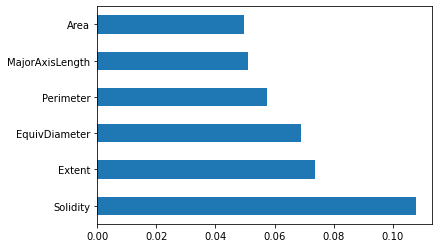

In [16]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(6).plot(kind='barh')
plt.show()

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf=RandomForestClassifier(random_state=0)

In [19]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [20]:
predr=rf.predict(X_test)

In [21]:
print(classification_report(predr,y_test))
print('train',rf.score(X_train,y_train))
print('test',rf.score(X_test,y_test))
print(confusion_matrix(predr,y_test))

              precision    recall  f1-score   support

           1       0.98      0.99      0.98       695
           2       1.00      0.99      1.00       686
           3       0.98      0.98      0.98       693
           4       1.00      1.00      1.00       691

    accuracy                           0.99      2765
   macro avg       0.99      0.99      0.99      2765
weighted avg       0.99      0.99      0.99      2765

train 0.9998191518220454
test 0.9898734177215189
[[687   0   8   0]
 [  2 680   4   0]
 [ 14   0 679   0]
 [  0   0   0 691]]


In [164]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train, y_train) # y_train, not y_train_5
pred9=svm_clf.predict(X_test)

In [165]:
print(classification_report(pred9,y_test))
print('train',svm_clf.score(X_train,y_train))
print('test',svm_clf.score(X_test,y_test))
print(confusion_matrix(pred9,y_test))

              precision    recall  f1-score   support

           1       0.80      0.73      0.76      1142
           2       0.59      0.69      0.63       895
           3       0.63      0.60      0.62      1072
           4       0.84      0.85      0.85      1039

    accuracy                           0.72      4148
   macro avg       0.72      0.72      0.71      4148
weighted avg       0.72      0.72      0.72      4148

train 0.7183753617197189
test 0.71648987463838
[[829  94 160  59]
 [ 25 618 183  69]
 [124 270 643  35]
 [ 56  72  29 882]]


In [33]:


from sklearn.preprocessing import StandardScaler



In [34]:
scaler = StandardScaler()

In [35]:
X1_train=scaler.fit_transform(X_train)
X1_test=scaler.fit_transform(X_test)

In [36]:
X1=scaler.fit_transform(X)


In [37]:
test1=scaler.fit_transform(test)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:


knn1 = KNeighborsClassifier(n_neighbors=1,p=2,leaf_size=2)



In [45]:
knn1.fit(X1_train,y_train)

KNeighborsClassifier(leaf_size=2, n_neighbors=1)

In [46]:


pred10 = knn1.predict(X1_test)



In [47]:
print(classification_report(pred10,y_test))
print('train',knn1.score(X1_train,y_train))
print('test',knn1.score(X1_test,y_test))
print(confusion_matrix(pred10,y_test))

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       706
           2       1.00      1.00      1.00       681
           3       0.99      1.00      1.00       687
           4       1.00      1.00      1.00       691

    accuracy                           1.00      2765
   macro avg       1.00      1.00      1.00      2765
weighted avg       1.00      1.00      1.00      2765

train 0.9998191518220454
test 0.9974683544303797
[[702   1   3   0]
 [  0 679   2   0]
 [  1   0 686   0]
 [  0   0   0 691]]


In [362]:


error_rate = []

# Will take some time
for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i,weights='distance',p=2)
    knn.fit(X1_train,y_train)
    pred_i = knn.predict(X1_test)
    error_rate.append(np.mean(pred_i != y_test))



Text(0, 0.5, 'Error Rate')

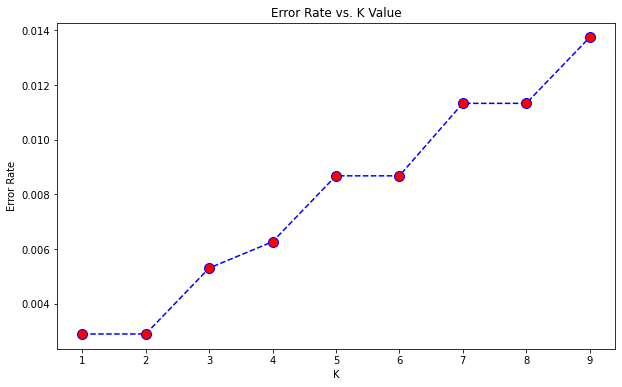

In [363]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [388]:
from sklearn.model_selection import GridSearchCV

In [390]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,10))
p=[1,2]#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)#Create new KNN object
knn_2 = KNeighborsClassifier()#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)#Fit the model
best_model = clf.fit(X1_train,y_train)#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 2
Best p: 2
Best n_neighbors: 1
